In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/Users/firdevsdemirci/Desktop/persona.csv")

In [3]:
data.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
print(data.shape)
print(data.dtypes)

(5000, 5)
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object


In [5]:
print(data.describe())

             PRICE          AGE
count  5000.000000  5000.000000
mean     34.132000    23.581400
std      12.464897     8.995908
min       9.000000    15.000000
25%      29.000000    17.000000
50%      39.000000    21.000000
75%      39.000000    27.000000
max      59.000000    66.000000


In [6]:
data.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

In [7]:
data.isnull().values.any()

False

In [8]:
print(data.isnull().sum())

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64


In [9]:
kat_data=data.select_dtypes(include=["object"])

In [10]:
kat_data.head()

,SOURCE,SEX,COUNTRY
0,android,male,bra
1,android,male,bra
2,android,male,bra
3,android,male,tur
4,android,male,tur


Sütundaki benzersiz değerleri görmek için kullanılır.

In [11]:
unique_values=data['SOURCE'].unique()
print(unique_values)

['android' 'ios']


In [12]:
unique_values=data['PRICE'].unique()
print(unique_values)

[39 49 29 19 59  9]


In [13]:
unique_values=data['AGE'].unique()
print(unique_values)

[17 26 23 15 19 21 16 35 42 40 49 34 18 32 25 30 20 22 50 37 24 31 28 66
 27 47 57 52 39 59 46 36 29 51 55 53 33 43 38 56 54 41 44 45 65 61]


In [14]:
unique_values=data['COUNTRY'].unique()
print(unique_values)

['bra' 'tur' 'usa' 'can' 'deu' 'fra']


Farklı değerlerin sayısını bulmak için kullanılır.

In [15]:
data['AGE'].nunique()

46

In [16]:
data['PRICE'].nunique()

6

In [17]:
data['COUNTRY'].nunique()

6

Harcama tutarı ve yaşı en büyük olan müşteri bulmak için kullanılır.

In [18]:
data["AGE"].max()

66

In [19]:
data["PRICE"].max()

59

Harcama tutarı ve yaşı en küçük olan müşteri bulmak için kullanılır.

In [20]:
data["AGE"].min()

15

In [21]:
data["PRICE"].min()

9

In [22]:
popular_products=data['SOURCE'].value_counts().head()
print(popular_products)

SOURCE
android    2974
ios        2026
Name: count, dtype: int64


In [23]:
popular_products=data['SEX'].value_counts().head()
print(popular_products)

SEX
female    2621
male      2379
Name: count, dtype: int64


In [24]:
popular_products=data['AGE'].value_counts().head()
print(popular_products)

AGE
15    569
16    494
17    450
18    348
19    309
Name: count, dtype: int64


In [25]:
popular_products=data['COUNTRY'].value_counts().head()
print(popular_products)

COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
Name: count, dtype: int64


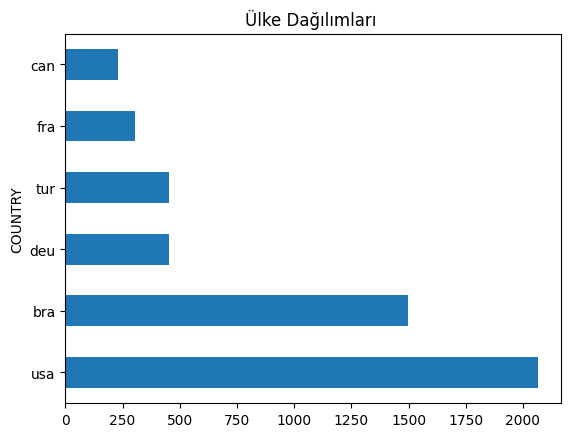

In [26]:
(data["COUNTRY"]
 .value_counts()
 .plot.barh()
 .set_title("Ülke Dağılımları "));

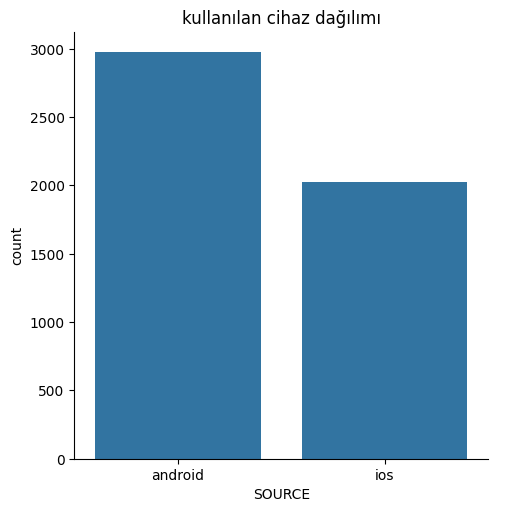

In [27]:
sns.catplot(x="SOURCE",kind="count", data=data);
plt.title("kullanılan cihaz dağılımı")
plt.show()

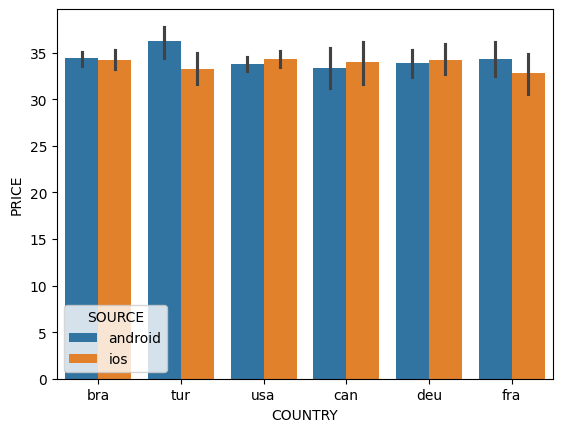

In [28]:
sns.barplot(x="COUNTRY",y="PRICE",hue="SOURCE",data=data);
plt.show()

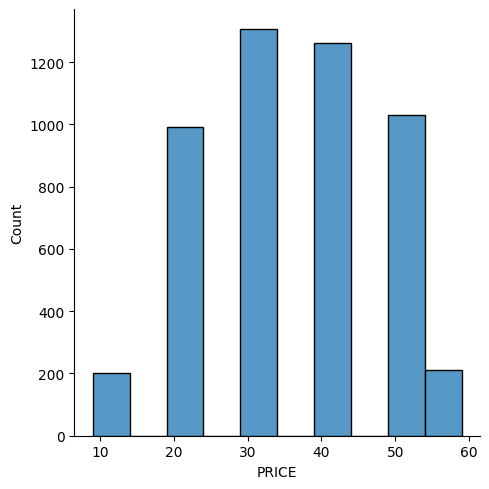

In [29]:
sns.displot(data.PRICE,bins=10,kde=False);

Ortalamalarını öğrenmek için kullanılır.

In [30]:
data.groupby('COUNTRY').agg({'PRICE': 'mean'})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [31]:
data.groupby(['COUNTRY' , 'SEX']).agg({'PRICE': 'mean'})

PRICE
COUNTRY SEX              
bra     female  34.557047
        male    34.099867
can     female  32.000000
        male    35.083333
deu     female  33.942085
        male    34.153061
fra     female  33.238411
        male    33.934211
tur     female  34.663082
        male    34.988372
usa     female  33.651811
        male    34.394737

In [32]:
data.groupby(['COUNTRY' , 'SOURCE']).agg({'PRICE': 'mean'})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [33]:
data.groupby(['COUNTRY' , 'SOURCE' , 'SEX' , 'AGE']).agg({'PRICE': 'mean'})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

In [34]:
data = data.groupby(['COUNTRY' , 'SOURCE' , 'SEX' , 'AGE']).agg({'PRICE': 'mean'})

data.sort_values(by = ['PRICE'] , ascending= False , inplace= True)

data.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [35]:
data.reset_index(inplace=True)
data.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


Sayısal verileri kategorik değişkene çevirmek için kullanılır.

In [36]:
data['AGE_KATEGORİK'] = pd.cut(x = data['AGE'],
                         bins = [0 , 18 , 24, 30 , 40 , 70],
                         labels = ['0_18' , '19_24' , '25_30' , '31_40' , '41_67'])

data

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_KATEGORİK
0,bra,android,male,46,59.0,41_67
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,19_24
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,25_30
345,can,android,female,27,19.0,25_30
346,fra,android,male,18,19.0,0_18


In [37]:
data["customer_identification"] = ['_'.join(i).upper() for i in data.drop(["AGE", "PRICE"],  axis=1).values]
data.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_KATEGORİK,customer_identification
0,bra,android,male,46,59.0,41_67,BRA_ANDROID_MALE_41_67
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,19_24,FRA_ANDROID_FEMALE_19_24
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [38]:
data["SEGMENT"] = pd.qcut(data["PRICE"], 4, labels=["D", "C", "B", "A"])

data.reset_index(inplace= True)

data.head()

data.groupby(['SEGMENT']).agg({'PRICE': ['mean' , 'max' , 'sum']})

/var/folders/kd/1sg8868x10q3krs1wlj1t_sw0000gn/T/ipykernel_1833/1936044890.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['SEGMENT']).agg({'PRICE': ['mean' , 'max' , 'sum']})


PRICE                        
              mean        max          sum
SEGMENT                                   
D        27.302596  31.105263  2375.325850
C        32.933339  34.000000  3128.667165
B        35.436170  37.000000  2870.329792
A        41.434736  59.000000  3521.952577

YENİ MÜŞTERİLERİ SINIFLANDIRIP, NE KADAR GELİR GETİRECEKLERİNİ TAHMİN EDER.

27 Yaşında Android Kullanan Bir Türk Erkeğinin Hangi Segmentte Olup, Ortalama Ne Kadar Gelir Kazandırdığını Gösterir.

In [39]:
customer_definition_tur='TUR_ANDROID_MALE_25_30'

data[data['customer_identification'] ==customer_definition_tur]

,index,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_KATEGORİK,customer_identification,SEGMENT
28,28,tur,android,male,25,41.500000,25_30,TUR_ANDROID_MALE_25_30,A
36,36,tur,android,male,27,40.666667,25_30,TUR_ANDROID_MALE_25_30,A
42,42,tur,android,male,26,39.666667,25_30,TUR_ANDROID_MALE_25_30,A


In [40]:
customer_definition_deu='DEU_IOS_FEMALE_19_24'

data[data['customer_identification'] == customer_definition_deu]

,index,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_KATEGORİK,customer_identification,SEGMENT
178,178,deu,ios,female,22,34.0,19_24,DEU_IOS_FEMALE_19_24,C
188,188,deu,ios,female,23,34.0,19_24,DEU_IOS_FEMALE_19_24,C
298,298,deu,ios,female,24,29.0,19_24,DEU_IOS_FEMALE_19_24,D


In [41]:
customer_definition_usa='USA_IOS_MALE_31_40'

data[data['customer_identification'] == customer_definition_usa]

,index,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_KATEGORİK,customer_identification,SEGMENT
3,3,usa,ios,male,32,54.000000,31_40,USA_IOS_MALE_31_40,A
31,31,usa,ios,male,31,41.000000,31_40,USA_IOS_MALE_31_40,A
250,250,usa,ios,male,37,31.727273,31_40,USA_IOS_MALE_31_40,C
278,278,usa,ios,male,33,30.304348,31_40,USA_IOS_MALE_31_40,D
332,332,usa,ios,male,36,24.000000,31_40,USA_IOS_MALE_31_40,D
